In [1]:
# import all the libraries necessary for sentiment analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk



In [2]:
# Load the data
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display the first few rows
df.head(3)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A


## Perform Sentiment Analysis on Headlines
We'll use TextBlob for sentiment analysis. It gives us a polarity score which we can classify as positive, negative, or neutral.
- We will count all the postive, negative, and neutral using countplot. 

In [3]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the headlines
df['sentiment'] = df['headline'].apply(analyze_sentiment)

# Display sentiment counts
df['sentiment'].value_counts()


sentiment
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64

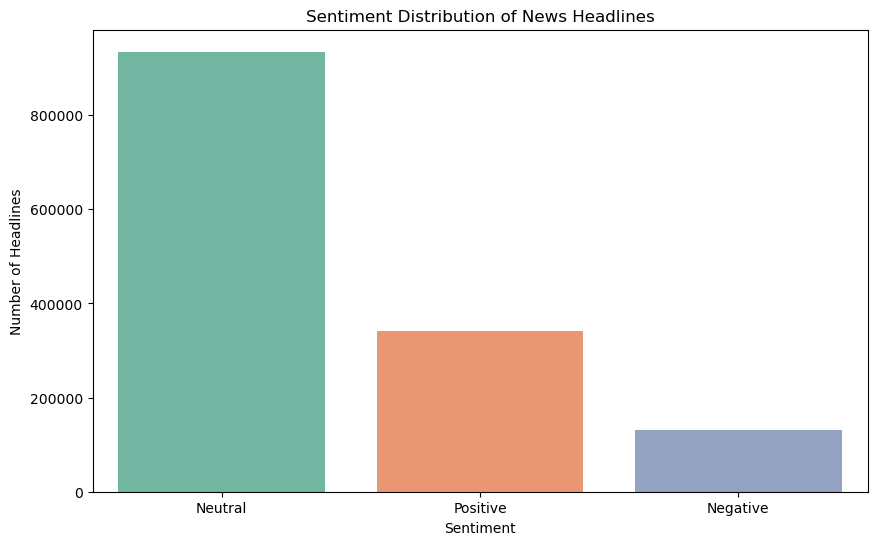

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution of News Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.show()


**conclusion:**
- Most of the headlines have Neutral sentimient. 
- Headlines are more postive than negative. 

## Create a Frequent Word Bubble Plot
We'll visualize the most common words in the headlines using a WordCloud, and we'll modify it to show word frequency in a bubble-style plot.

**We will following the following steps:**
- remove stop word
- toknize all the rows within the 'headline' column
- combine all tokens
- count the word frequency
- plot the images 

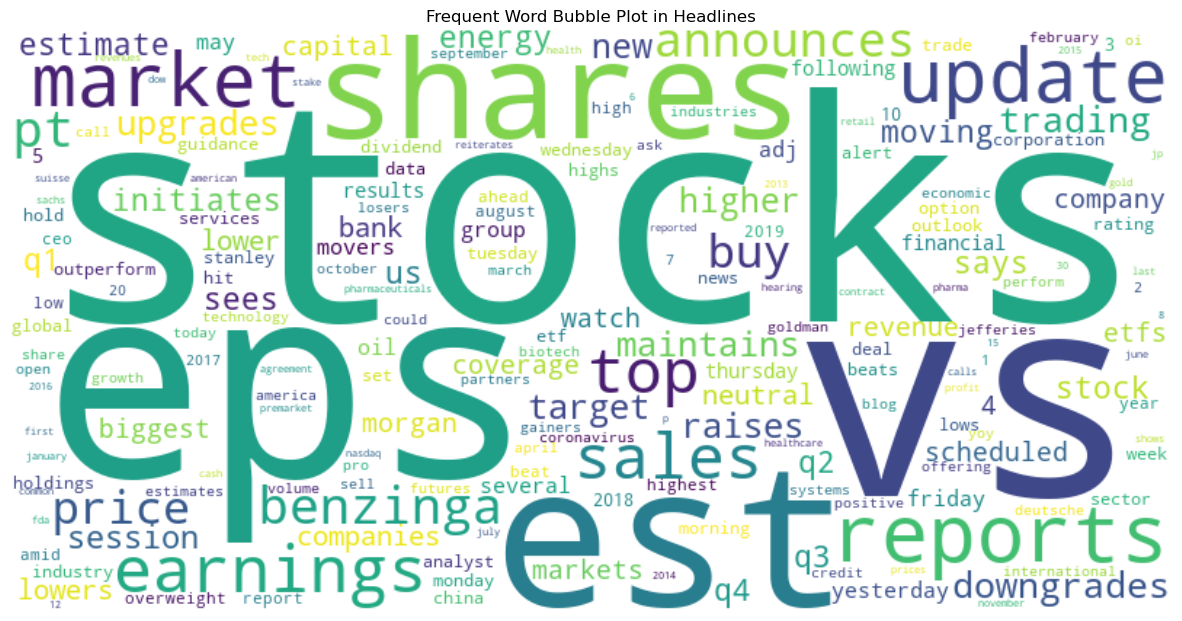

In [5]:
# Combine all headlines into a single string
text = ' '.join(df['headline'].values)

# Tokenize and clean the text
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_words = [word.lower() for word in word_tokens if word.isalnum() and word.lower() not in stop_words]

# Generate a word frequency distribution
word_freq = pd.Series(filtered_words).value_counts()

# Create a WordCloud object with bubble-style visualization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', random_state=42,
                      prefer_horizontal=1, contour_color='steelblue', contour_width=1).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Word Bubble Plot in Headlines")
plt.show()


## Observation 
- Stockes, eps, vs, est, shares, update, market, reports, benzinga etc are most observed words on the headline. 

**let's see the biagrams** 

In [6]:
from collections import Counter
from nltk.util import ngrams

# Extract bigrams from the text
bigrams = ngrams(filtered_words, 2)
bigram_freq = Counter(bigrams)

# Display the most common bigrams
bigram_freq.most_common(10)


[(('vs', 'est'), 93818),
 (('eps', 'vs'), 59520),
 (('price', 'target'), 47264),
 (('benzinga', 'top'), 44259),
 (('stocks', 'moving'), 40038),
 (('market', 'update'), 33159),
 (('earnings', 'scheduled'), 32054),
 (('initiates', 'coverage'), 28981),
 (('raises', 'pt'), 27264),
 (('shares', 'several'), 24078)]

**Conclusion:**
In this analysis, we explore the most frequent bigrams (pairs of consecutive words) found in the headlines from our dataset. Bigram analysis helps to uncover common themes, terms, and key phrases that are prevalent in financial news reporting. Below is a breakdown of the top 10 most frequent bigrams and what they reveal:

- **Earnings and Estimates**: The frequent appearance of "vs est" and "EPS vs" highlights the importance of earnings reports in financial news. These comparisons between actual performance and estimates are crucial for market participants.

- **Price Targets**: The bigrams related to price targets ("price target," "raises pt") show that forecasting stock prices is a central theme in financial news, guiding investor expectations.

- **Benzinga's Influence**: The presence of "benzinga top" reveals that Benzinga is a significant source of curated lists in financial news, providing top picks and movers to its audience.

- **Market Movement and Updates**: Bigrams like "stocks moving" and "market update" indicate that a large portion of financial news is dedicated to tracking and reporting on market activity, which is essential for traders.

- **Analyst Coverage**: The phrase "initiates coverage" suggests the importance of new analyst reports in shaping market sentiment and investor decisions.